In [141]:
from impala.dbapi import connect
#from impala.util import as_pandas
from pandas import set_option
from vluigi.impaladb import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
cli = ImpalaCommandClient()

fl_data_file = "/home/idb_atg_juno/work/Aug8N303RGflData.csv"
rl_data_file = "/home/idb_atg_juno/work/Aug8N303RGrlData.csv"
beam_data_file = "/home/idb_atg_juno/work/Aug8N303RGbeamData.csv"

data_array_fl = []

data_array_beam = []

data_array_rl = []


query_fmt_string="""SELECT 
    per_slot.mac_addr,
    per_slot.slot_id,
    per_slot.fl_sinr,
    per_slot.databus_timestamp,
    per_slot.year,
    per_slot.month,
    per_slot.day,
    beam_info.logical_beam_id,
    beam_info.state
FROM 
    smac.smac_ut_fl_slot_flat_v9 as per_slot
JOIN
    smac.smac_ut_flat_v9 as beam_info
ON
    beam_info.mac_addr = per_slot.mac_addr
    AND beam_info.databus_timestamp = per_slot.databus_timestamp
WHERE 
    per_slot.mac_addr = "00:a0:bc:87:86:c2" 
    AND per_slot.year = 2018 
    AND per_slot.month = 8 
    AND per_slot.day >= {day_min}
    AND per_slot.day <= {day_max}
    AND per_slot.databus_timestamp >= {start_epoch}
    AND per_slot.databus_timestamp <= {stop_epoch}
    AND beam_info.state = "on_line"
ORDER BY
    databus_timestamp
LIMIT 1000000;
"""

query_fmt_stringbeam="""SELECT 
    beam_info.logical_beam_id,
    beam_info.state,
    beam_info.databus_timestamp,
    beam_info.year,
    beam_info.month,
    beam_info.day

FROM 
    smac.smac_ut_flat_v9 as beam_info

WHERE 
    beam_info.mac_addr = "00:a0:bc:87:86:c2" 
    AND beam_info.year = 2018 
    AND beam_info.month = 8 
    AND beam_info.day >= {day_min}
    AND beam_info.day <= {day_max}
    AND beam_info.databus_timestamp >= {start_epoch}
    AND beam_info.databus_timestamp <= {stop_epoch}
ORDER BY
    beam_info.databus_timestamp 
LIMIT 1000000;
"""

query_fmt_stringfl="""SELECT 
    per_slot.mac_addr,
    per_slot.slot_id,
    per_slot.fl_sinr,
    per_slot.fl_mod_code_pt,
    per_slot.databus_timestamp,
    per_slot.year,
    per_slot.month,
    per_slot.day

FROM 
    smac.smac_ut_fl_slot_flat_v9 as per_slot

WHERE 
    per_slot.mac_addr = "00:a0:bc:87:86:c2" 
    AND per_slot.year = 2018 
    AND per_slot.month = 8 
    AND per_slot.day >= {day_min}
    AND per_slot.day <= {day_max}
    AND per_slot.databus_timestamp >= {start_epoch}
    AND per_slot.databus_timestamp <= {stop_epoch}
ORDER BY
    per_slot.databus_timestamp 
LIMIT 1000000;
"""




query_fmt_stringrl="""SELECT 
    per_slot.mac_addr,
    per_slot.slot_id,
    per_slot.rl_sinr,
    per_slot.rl_mod_code_pt,
    per_slot.databus_timestamp,
    per_slot.year,
    per_slot.month,
    per_slot.day

FROM 
    smac.smac_ut_rl_slot_flat_v9 as per_slot

WHERE 
    per_slot.mac_addr = "00:a0:bc:87:86:c2" 
    AND per_slot.year = 2018 
    AND per_slot.month = 8 
    AND per_slot.day >= {day_min}
    AND per_slot.day <= {day_max}
    AND per_slot.databus_timestamp >= {start_epoch}
    AND per_slot.databus_timestamp <= {stop_epoch}
ORDER BY
    per_slot.databus_timestamp 
LIMIT 1000000;
"""



query_fmt_stringflrl="""SELECT 
    fl_per_slot.mac_addr,
    fl_per_slot.slot_id as fl_slot_id,
    fl_per_slot.fl_sinr,
    fl_per_slot.fl_mod_code_pt,
    fl_per_slot.databus_timestamp,
    fl_per_slot.year,
    fl_per_slot.month,
    fl_per_slot.day,
    rl_per_slot.slot_id as rl_slot_id,
    rl_per_slot.rl_sinr,
    rl_per_slot.rl_mod_code_pt,
    beam_info.logical_beam_id,
    beam_info.state
FROM 
    smac.smac_ut_fl_slot_flat_v9 as fl_per_slot
INNER JOIN
    smac.smac_ut_flat_v9 as beam_info
ON
    beam_info.mac_addr = fl_per_slot.mac_addr
    AND beam_info.databus_timestamp = fl_per_slot.databus_timestamp
INNER JOIN 
    smac.smac_ut_rl_slot_flat_v9 as rl_per_slot
ON 
    beam_info.mac_addr = rl_per_slot.mac_addr
    AND beam_info.databus_timestamp = rl_per_slot.databus_timestamp
    
WHERE 
    fl_per_slot.mac_addr = "00:a0:bc:87:86:c2" 
    AND fl_per_slot.year = 2018 
    AND fl_per_slot.month = 8 
    AND fl_per_slot.day >= {day_min}
    AND fl_per_slot.day <= {day_max}
    AND fl_per_slot.databus_timestamp >= {start_epoch}
    AND fl_per_slot.databus_timestamp <= {stop_epoch}
    AND beam_info.state != "handover"
ORDER BY
    databus_timestamp
LIMIT 1000000;
"""








#2018-08-04 00:00:00+00 1533340800
#2018-08-01 17:00:00+00 1533426600
fmt_dict = {"day_min":8,"day_max":8,"start_epoch":1533744030,"stop_epoch":1533754230}

data_array_fl.append(cli.as_pandas(query_fmt_stringfl.format(**fmt_dict)))


#print(data_array_fl)

data_array_fl[0].to_csv(fl_data_file)

print("Done FL")

data_array_rl.append(cli.as_pandas(query_fmt_stringrl.format(**fmt_dict)))

#print(data_array_rl)

data_array_rl[0].to_csv(rl_data_file)

print("Done RL")

data_array_beam.append(cli.as_pandas(query_fmt_stringbeam.format(**fmt_dict)))

#print(data_array_beam)

data_array_beam[0].to_csv(beam_data_file)

print("Done Beam")

print("Done")

Done FL
Done RL
Done Beam
Done


In [142]:
def flSlotPipeCalc(row):
    #print(row['fl_mod_code_pt'])
    symbolsperslot= 463.0
    if row['fl_mod_code_pt'] =='fl_qpsk_2_5':
        return ((symbolsperslot*2*2/(64.0*5.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_1_4':
        return ((symbolsperslot*2*1/(64.0*4.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_4_15':
        return ((symbolsperslot*2*4/(64.0*15.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_1_3':
        return ((symbolsperslot*2*1/(64.0*3.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_1_2':
        return ((symbolsperslot*2*1/(64.0*2.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_8_15':
        return ((symbolsperslot*2*8/(64.0*15.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_3_5':
        return ((symbolsperslot*2*3/(64.0*5.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_2_3':
        return ((symbolsperslot*2*2/(64.0*3.0)))
    if row['fl_mod_code_pt'] =='fl_qpsk_3_4':
        return ((symbolsperslot*2*3/(64.0*4.0)))
    if row['fl_mod_code_pt'] =='fl_bpsk_1_3':
        return ((symbolsperslot*1*1/(64.0*3.0)))
    if row['fl_mod_code_pt'] =='fl_bpsk_1_5':
        return ((symbolsperslot*1*1/(64.0*5.0)))
    if row['fl_mod_code_pt'] =='fl_bpsk_4_15':
        return ((symbolsperslot*1*4/(64.0*15.0)))
    if row['fl_mod_code_pt'] =='fl_16_apsk_2_5':
        return ((symbolsperslot*1*4*2/(64.0*5.0)))
    
    print(row['fl_mod_code_pt'])
    return (-1)
            
def rlSlotPipeCalc(row):
    #print(row['fl_mod_code_pt'])
    symbolsperslot= 80.0
    if row['rl_mod_code_pt'] =='rl_qpsk_2_5':
        return ((symbolsperslot*2*2/(64.0*5.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_1_4':
        return ((symbolsperslot*2*1/(64.0*4.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_4_15':
        return ((symbolsperslot*2*4/(64.0*15.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_1_3':
        return ((symbolsperslot*2*1/(64.0*3.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_1_2':
        return ((symbolsperslot*2*1/(64.0*2.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_8_15':
        return ((symbolsperslot*2*8/(64.0*15.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_3_5':
        return ((symbolsperslot*2*3/(64.0*5.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_2_3':
        return ((symbolsperslot*2*2/(64.0*3.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_3_4':
        return ((symbolsperslot*2*3/(64.0*4.0)))
    if row['rl_mod_code_pt'] =='rl_bpsk_1_3':
        return ((symbolsperslot*1*1/(64.0*3.0)))
    if row['rl_mod_code_pt'] =='rl_bpsk_1_5':
        return ((symbolsperslot*1*1/(64.0*5.0)))
    if row['rl_mod_code_pt'] =='rl_bpsk_4_15':
        return ((symbolsperslot*1*4/(64.0*15.0)))
    if row['rl_mod_code_pt'] =='rl_bpsk_1_2':
        return ((symbolsperslot*1*1/(64.0*2.0)))
    if row['rl_mod_code_pt'] =='rl_qpsk_3_8':
        return ((symbolsperslot*2*3/(64.0*8.0)))
    print(row['rl_mod_code_pt'])
    return (-1)

In [143]:
df_fl = pd.read_csv(fl_data_file)
df_fl = df_fl.convert_objects(convert_numeric=True)
df_fl['slotPipe'] = df_fl.apply (lambda row: flSlotPipeCalc (row),axis=1)
df_fl['total_pipe_size'] = df_fl['slotPipe'].groupby(df_fl['databus_timestamp']).transform('sum')
df_fl['databus_timestamp']=pd.to_datetime(df_fl['databus_timestamp'], unit ='s')
df_fl = df_fl.drop_duplicates('databus_timestamp')



/home/idb_atg_juno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [144]:
df_rl = pd.read_csv(rl_data_file)
df_rl = df_rl.convert_objects(convert_numeric=True)
df_rl['slotPipe'] = df_rl.apply (lambda row: rlSlotPipeCalc (row),axis=1)
df_rl['total_pipe_size'] = df_rl['slotPipe'].groupby(df_rl['databus_timestamp']).transform('sum')
df_rl['databus_timestamp']=pd.to_datetime(df_rl['databus_timestamp'], unit ='s')
print(df_rl)
df_rl = df_rl.drop_duplicates('databus_timestamp')



     Unnamed: 0           mac_addr  slot_id  rl_sinr rl_mod_code_pt  \
0             0  00:a0:bc:87:86:c2       52     5.16    rl_qpsk_3_8   
1             1  00:a0:bc:87:86:c2       18     5.15    rl_qpsk_3_8   
2             2  00:a0:bc:87:86:c2       21     6.25    rl_qpsk_3_8   
3             3  00:a0:bc:87:86:c2       18     5.15    rl_qpsk_3_8   
4             4  00:a0:bc:87:86:c2       21     6.25    rl_qpsk_3_8   
5             5  00:a0:bc:87:86:c2       52     5.57    rl_qpsk_3_8   
6             6  00:a0:bc:87:86:c2       18     4.37    rl_qpsk_3_8   
7             7  00:a0:bc:87:86:c2       52     5.07    rl_qpsk_3_8   
8             8  00:a0:bc:87:86:c2       21     6.25    rl_qpsk_3_8   
9             9  00:a0:bc:87:86:c2       52     4.84    rl_qpsk_3_8   
10           10  00:a0:bc:87:86:c2       21     6.25    rl_qpsk_3_8   
11           11  00:a0:bc:87:86:c2       18     4.77    rl_qpsk_3_8   
12           12  00:a0:bc:87:86:c2       18     4.15    rl_qpsk_3_8   
13    

/home/idb_atg_juno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [145]:
df_beam = pd.read_csv(beam_data_file)
df_beam = df_beam.convert_objects(convert_numeric=True)


/home/idb_atg_juno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


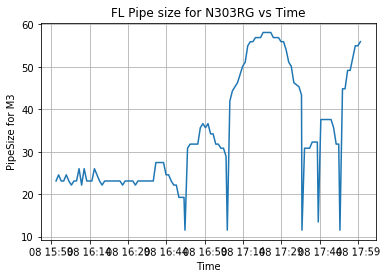

In [146]:
plt.title("FL Pipe size for N303RG vs Time")
plt.xlabel("Time")
plt.ylabel("PipeSize for M3")
plt.ion()
plt.grid()
plt.xticks(rotation=1)
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d Mbps'))
plt.plot(df_fl['databus_timestamp'],df_fl['total_pipe_size'])

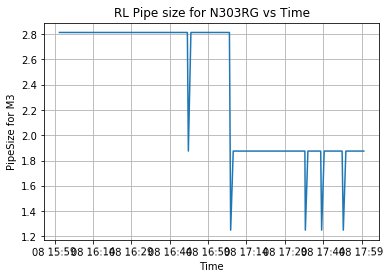

In [147]:
plt.title("RL Pipe size for N303RG vs Time")
plt.xlabel("Time")
plt.ylabel("PipeSize for M3")
plt.ion()
plt.grid()
plt.xticks(rotation=1)
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d Mbps'))
plt.plot(df_rl['databus_timestamp'],df_rl['total_pipe_size'])